<a href="https://colab.research.google.com/github/columose/SQL-BigQuery-/blob/main/Earthquake_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Big Query earthquake database**

This dataset was extracted from a public database on BigQuery relating to historically destructed earthquakes. I queried the most damaging earthquakes in history in terms of total deaths and damage in dollars.

```
# Query the highest dead tolls per country due to earthquakes
SELECT country,
  SUM(deaths) as deaths,
  ROUND(SUM(damage_millions_dollars),0) AS damage_millions
FROM `bigquery-public-data.noaa_significant_earthquakes.earthquakes`
GROUP BY country
ORDER BY deaths DESC
LIMIT 10;
```



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Query/Highest destruction per country_25.csv')

In [15]:
df

,country,deaths,damage_millions
0,CHINA,2074897,106527.0
1,IRAN,1083040,10883.0
2,TURKEY,1074769,24625.0
3,SYRIA,439224,NaN
4,ITALY,434863,54460.0
5,JAPAN,415138,180561.0
6,HAITI,323472,8000.0
7,AZERBAIJAN,317219,5.0
8,ARMENIA,191890,16200.0
9,PAKISTAN,148741,6761.0


In [4]:
# Clean dataset. Remove Nans
df_clean = df.dropna(axis = 0)
df_clean.reset_index(drop = True)

,country,deaths,damage_millions
0,CHINA,2074897,106527.0
1,IRAN,1083040,10883.0
2,TURKEY,1074769,24625.0
3,ITALY,434863,54460.0
4,JAPAN,415138,180561.0
5,HAITI,323472,8000.0
6,AZERBAIJAN,317219,5.0
7,ARMENIA,191890,16200.0
8,PAKISTAN,148741,6761.0
9,ECUADOR,129978,4826.0


<ipython-input-41-6ca0327f752f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(x_values,rotation = 45)
<ipython-input-41-6ca0327f752f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(x_values,rotation = 45)


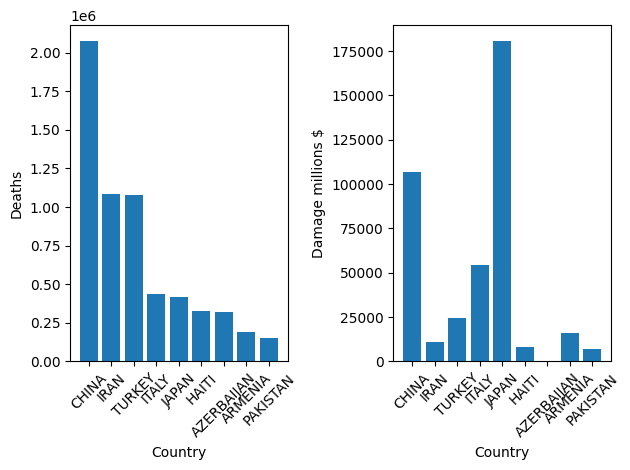

In [41]:
# Visualise damage per country

fig, axs = plt.subplots(1,2)

x_values = df_clean.country[:9]

axs[0].bar(x = x_values, height = df_clean.deaths[:9])
axs[0].set_ylabel('Deaths')
axs[0].set_xlabel('Country')
axs[0].set_xticklabels(x_values,rotation = 45)

axs[1].bar(x = x_values, height = df_clean.damage_millions[:9])
axs[1].set_ylabel('Damage millions $')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(x_values,rotation = 45)

fig.tight_layout()

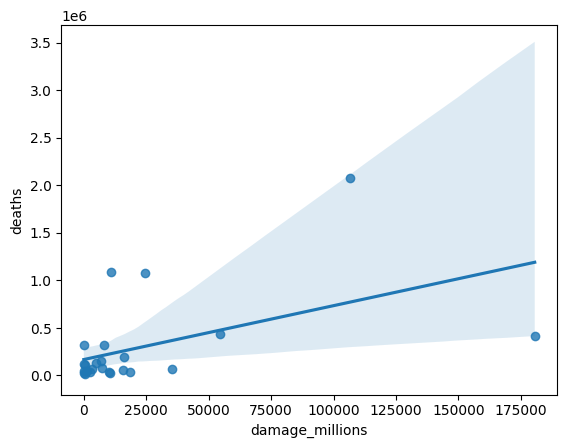

In [5]:
# Determine whether death count is indicative of damage in dollars using a regression plot
sns.regplot(x="damage_millions", y="deaths", data=df_clean);

In [6]:
# Prepare data for linear regression
X = df_clean['deaths']
y = df_clean['damage_millions']

from sklearn.model_selection import train_test_split

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [7]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16,), (8,), (16,), (8,))

In [8]:
# Choose Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
# Fit model
model.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [10]:
# Test model on data
y_pred = model.predict(X_test.values.reshape(-1,1))

In [11]:
# Determine model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

12815.936965395005
630.5110620352773
217384053.74059665


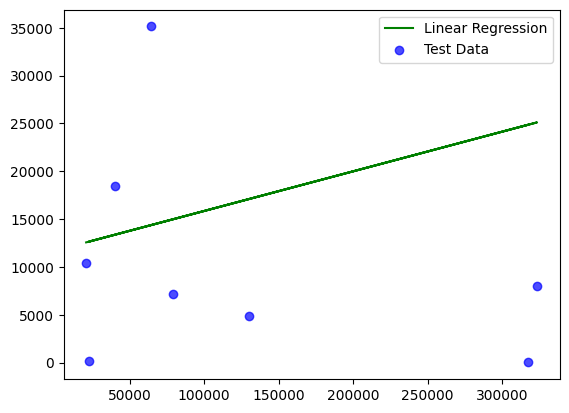

In [14]:
# Plot test data with regression line from our training data

plt.plot(X_test, y_pred, label = 'Linear Regression', color = 'g')
plt.scatter(X_test, y_test, label = 'Test Data', color = 'b', alpha = 0.7)
plt.legend()
plt.show()